In [1]:
parent_dir_name = 'Plant semantic segmentation'

In [2]:
#paths of folders
train_images_path = './'+str(parent_dir_name)+'/Data/train_images/'
train_masks_path = './'+str(parent_dir_name)+'/Data/train_masks/'
val_images_path = './'+str(parent_dir_name)+'/Data/val_images/'
val_masks_path = './'+str(parent_dir_name)+'/Data/val_masks/'

In [3]:
#apply augmentation
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(54)
img_data_gen_args = dict(rotation_range=90,
                     width_shift_range=0.3,
                     height_shift_range=0.3,
                     shear_range=0.5,
                     horizontal_flip=True,
                     vertical_flip=True,
                     fill_mode='reflect')
mask_data_gen_args = dict(rotation_range=90,
                     width_shift_range=0.3,
                     height_shift_range=0.3,
                     shear_range=0.5,
                     horizontal_flip=True,
                     vertical_flip=True,
                     fill_mode='reflect')
                                              

2023-05-01 10:47:19.168570: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
#create dataset 
#for training
image_data_generator = ImageDataGenerator(rescale=1.0/255.0, **img_data_gen_args)
train_image_generator = image_data_generator.flow_from_directory(train_images_path,
                                                           batch_size=8,
                                                           class_mode=None,
                                                           seed=54, target_size= (128,128) )
masks_data_generator = ImageDataGenerator(rescale=1.0/255.0, **mask_data_gen_args)
train_mask_generator = masks_data_generator.flow_from_directory(train_masks_path,
                                                                class_mode=None,
                                                                seed=54,target_size= (128,128),
                                                                color_mode = 'grayscale',
                                                                batch_size=8)
#for validation
image_data_generator = ImageDataGenerator(rescale=1.0/255.0)
test_image_generator=image_data_generator.flow_from_directory(val_images_path,
                                                              batch_size=8,
                                                              seed=54, target_size= (128,128) ,
                                                              class_mode=None)
mask_data_generator=  ImageDataGenerator(rescale=1.0/255.0)
test_masks_generator = mask_data_generator.flow_from_directory(val_masks_path,
                                                                batch_size=8, color_mode = 'grayscale',
                                                                seed=54, target_size= (128,128) ,
                                                                class_mode=None,
                                                               )

Found 51811 images belonging to 1 classes.
Found 51811 images belonging to 1 classes.
Found 10548 images belonging to 1 classes.
Found 10548 images belonging to 1 classes.


In [5]:
#create a function


import numpy as np
def image_mask_generator(image_generator, mask_generator):
  train_generator = zip(image_generator, mask_generator)
  for (img, mask) in train_generator:
    # mask = tf.one_hot(mask[:,:,:,0], 23, dtype=tf.int32)
    # mask.set_shape([2,640,640,23]) 
  
    #mask = np.array(tf.math.reduce_max(mask, axis=-1, keepdims=True))
    #mask = mask.astype('uint8')    
    

    yield (img, mask) 

(128, 128, 1)
(1, 128, 128, 3)
1/1 [==============================] - 0s 254ms/step


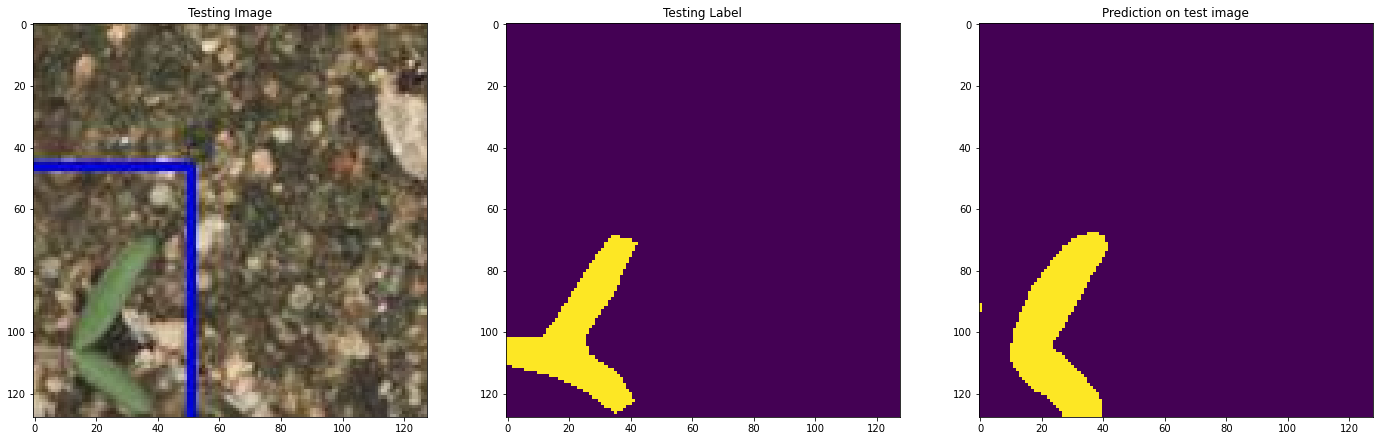

In [7]:
import tensorflow as tf

train_datagen = image_mask_generator(train_image_generator, train_mask_generator)
test_datagen  = image_mask_generator(test_image_generator, test_masks_generator)

model = tf.keras.models.load_model('./Plant semantic segmentation/segmentation_model_0.hdf5')

#making predictions
threshold = 0.5
#test_img_number = random.randint(0, num_vals-1)
x, y=test_datagen.__next__()
for i in range(0,1):
  test_img=x[i]
  ground_truth=y[i]
  print(ground_truth.shape)

# test_img = X_test[test_img_number]
# ground_truth=y_test[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
print(test_img_input.shape)
prediction = (model.predict(test_img_input)[0,:,:,:]>0.1)
# p = onehot_to_rgb(prediction)
p = tf.squeeze(prediction, -1)
# p = np.expand_dims(p, axis=-1)  
# p = p * (255/23)
# p = p.astype(np.int32)
# p = np.concatenate([p, p, p], axis=2)
# print(p.shape)

plt.figure(figsize=(24, 24))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img)
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0])
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(p)

plt.show()